## Equatorial plots

In [1]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
%matplotlib inline

In [2]:
# load WOA18 data
obs_path = '/glade/u/home/gmarques/Notebooks/CESM_MOM6/WOA18_remapping/'
obs_temp = xr.open_dataset(obs_path+'WOA18_TEMP_tx0.66v1_34lev_ann_avg.nc', decode_times=False)
obs_salt = xr.open_dataset(obs_path+'WOA18_SALT_tx0.66v1_34lev_ann_avg.nc', decode_times=False)
# get theta and salt and rename coordinates to be the same as the model's
thetao_obs = obs_temp.theta0.rename({'z_l': 'zl'});
salt_obs = obs_salt.s_an.rename({'z_l': 'zl'});
salt_obs['yh'] = grd.yh
thetao_obs['yh'] = grd.yh

In [3]:
def plot_comparison(model, var, obs, vmin, vmax, diff, cname):
  fig, ax = plt.subplots(nrows=3, ncols=1,
                       sharex=True,sharey=True,
                       figsize=(12,14))

  ax1 = ax.flatten()

  model[var].plot(ax=ax1[0], ylim=(500,0),
                     y="zl",vmin=vmin, vmax=vmax,
                     yincrease=False);

  obs.sel(yh=0., 
               method="nearest").plot(ax=ax1[1], ylim=(500, 0),
                                      y="zl",vmin=vmin, vmax=vmax,
                                      yincrease=False);

  (model[var] - obs.sel(yh=0., 
               method="nearest")).plot(ax=ax1[2], ylim=(500, 0),
                                      y="zl", cmap="bwr", vmin=-diff, vmax=diff, 
                                      yincrease=False);

  ax[0].set_title('Model, casename = {}'.format(cname)); ax[0].set_xlabel('')
  ax[1].set_title('Obs (WOA18)'); ax[1].set_xlabel('')
  ax[2].set_title('Model - Obs'); ax[2].set_xlabel('Longitude');
  return

#### Potential temperature

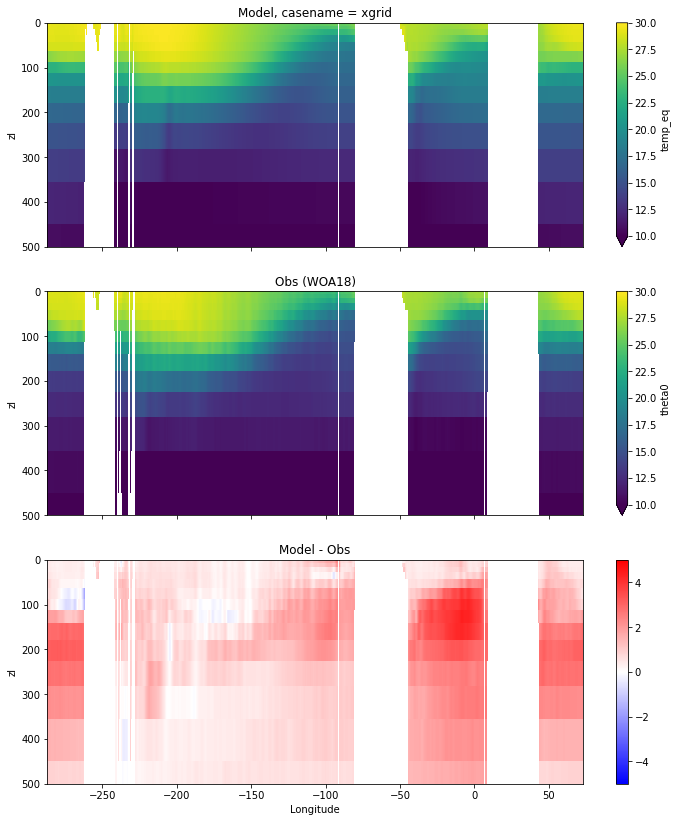

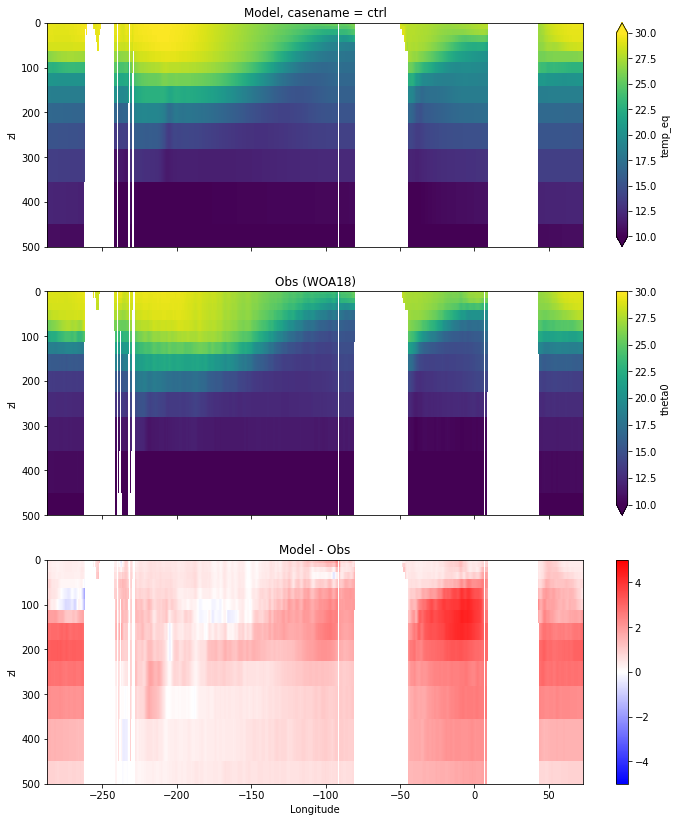

In [4]:
for path, case, i in zip(ocn_path, casename, range(len(casename))):
  ds_temp = xr.open_dataset(ocn_path[i]+casename[i]+'_temp_eq.nc')
  plot_comparison(ds_temp,'temp_eq',thetao_obs,10,30,5,label[i])

### Salinity

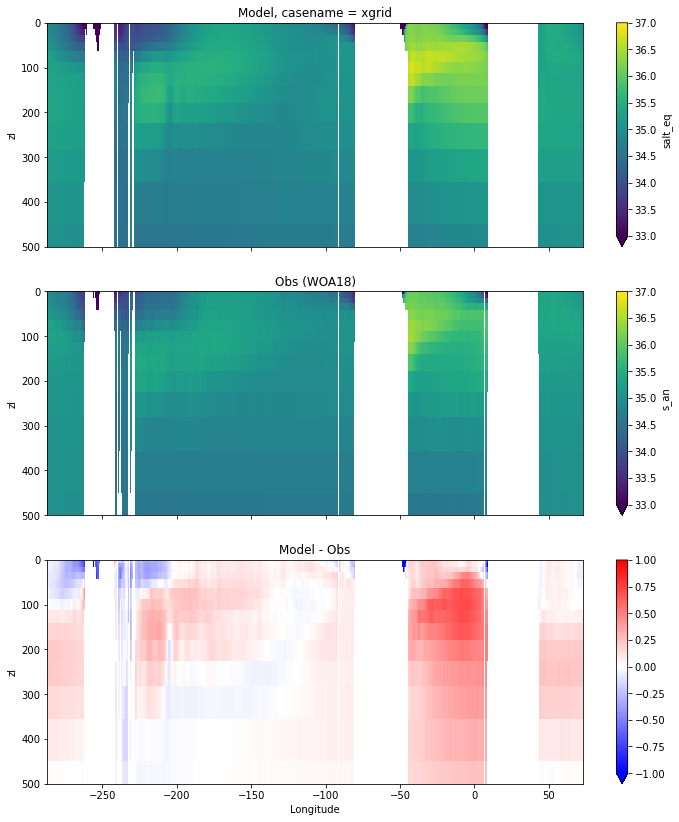

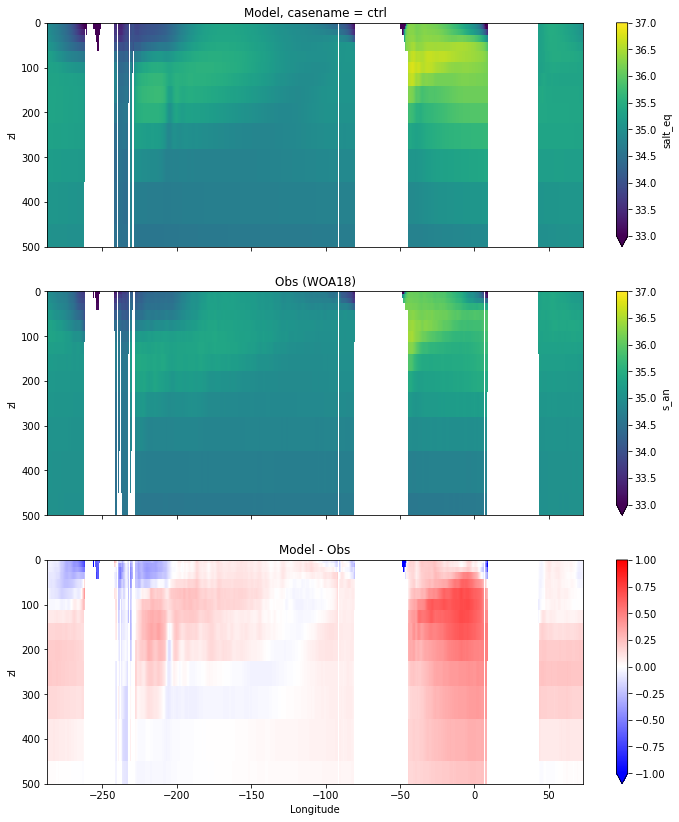

In [5]:
for path, case, i in zip(ocn_path, casename, range(len(casename))):
  ds_salt = xr.open_dataset(ocn_path[i]+casename[i]+'_salt_eq.nc')
  plot_comparison(ds_salt,'salt_eq',salt_obs,33,37,1,label[i])